In [395]:
#import libraries and load csv file
import pandas as pd
import numpy as np
import datetime as dtime
import matplotlib.pylab as plt
import datetime as dt
filepath = 'C:/Users/Conor/Desktop/391/data.csv'
data = pd.read_csv(filepath)
#test if file was read correctly
data.head(5)

,date,signal,spy_close_price
0,20120103,3.107767,127.495
1,20120104,3.107282,127.700
2,20120105,3.099757,128.040
3,20120106,3.134223,127.710
4,20120109,3.135922,128.020


In [396]:
#use the describe function to get an idea of the data and to see outliers in the min and max
data.describe()

,date,signal,spy_close_price
count,6.670000e+02,667.000000,667.000000
mean,2.012939e+07,5.166603,163.169369
std,7.762422e+03,23.392818,39.210384
min,2.012010e+07,-3.802670,127.495000
25%,2.012083e+07,3.418083,140.880000
50%,2.013051e+07,3.893689,159.750000
75%,2.014010e+07,4.408313,181.500000
max,2.014083e+07,432.961165,710.310000


In [397]:
#checking for Na values
data.apply(lambda x: sum(x.isnull()),axis=0) 

date               0
signal             0
spy_close_price    0
dtype: int64

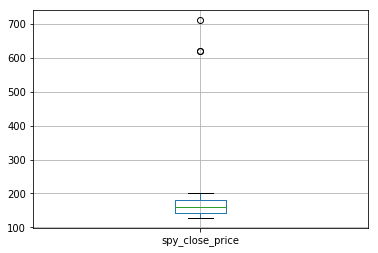

In [398]:
#no Na values so Na value don't need to be handled
#check the boxplot for outliers
data.boxplot(column='spy_close_price')
plt.show()

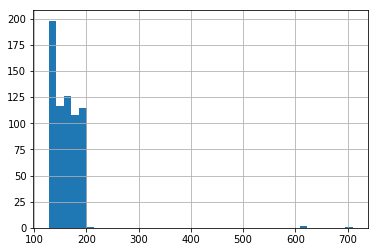

In [399]:
#look for outliers using a histogram
data['spy_close_price'].hist(bins=40)
plt.show()

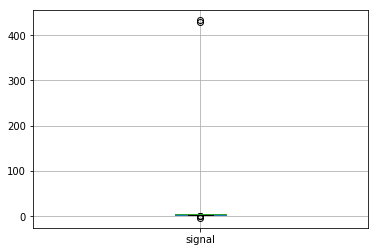

In [400]:
#look for outliers in signal with a boxplot
data.boxplot(column='signal')
plt.show()

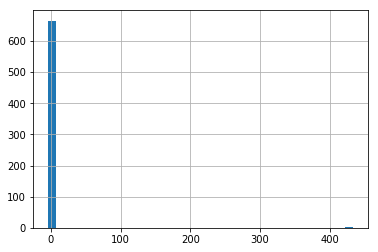

In [401]:
#look for outliers in signal using a histogram
data['signal'].hist(bins=40)
plt.show()

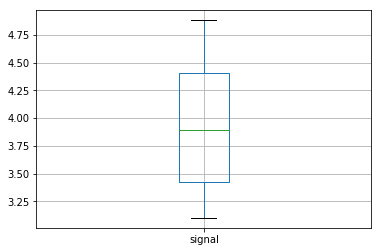

In [402]:
#replace outliers with median, median was chosen over mean because I wanted the outliers to have less of an impact on the
#replacement values
data.loc[data['spy_close_price'] > 300, 'spy_close_price'] = data['spy_close_price'].median()
data.loc[data['signal'] > 15, 'signal'] = data['signal'].median()
data.loc[data['signal'] < 1, 'signal'] = data['signal'].median()
data.describe()
data.boxplot(column='signal')
plt.show()
#check graphs again for outliers

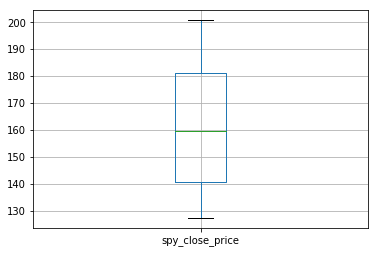

In [403]:
data.boxplot(column='spy_close_price')
plt.show()
#check graphs again for outliers

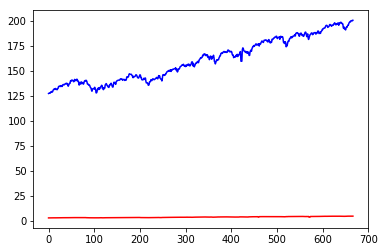

In [404]:
#make a graph to make a quick visual assignment to see if there is any obvious correlation between signal
#and spy close price
plt.plot(data['signal'].values, color='red')
plt.plot(data['spy_close_price'].values, color='blue')
plt.show()

In [405]:
#convert int to datetime objects to be more easily readable
data['date2'] = data['date'].apply(lambda x: str(x))
data['date2'] = data['date2'].apply(lambda x: dt.datetime.strptime(x,'%Y%m%d'))

In [406]:
#make the spy_close_price column of the dataframe a series with the dates as its index
ts = pd.Series(data['spy_close_price'])
ts.index = data['date2']
#check how many values there are
len(data['signal'])

667

r2 score:
0.8672893861441628
mean squared error:
17.76815851063855


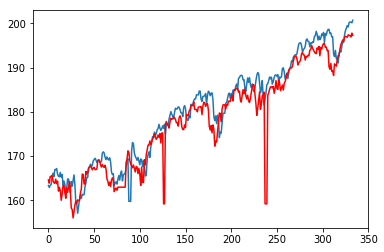

In [407]:
#linear regression to see if singal can predict the spy close price
#the first split of the data into training and testing was done 50/50, after this other divisions were tried to see which 
#had the best results
#r2 score and mean squared error was used to check accuracy numerically, graphs were used to check accuracy visually
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
#split into data into training and test sets
signal = data['signal']
sigTrain = signal[:333]
sigTrain = sigTrain.values
sigTrain.shape = (333, 1)
sigTest = signal[333:]
sigTest = sigTest.values
sigTest.shape = (334,1)
spy = data['spy_close_price']
spyTrain = spy[:333]
spyTrain = spyTrain.values
spyTrain.shape = (333, 1)
spyTest = spy[333:]
spyTest = spyTest.values
spyTest.shape = (334,1)
#train the model
regr.fit(sigTrain, spyTrain)
#predict values
pred = regr.predict(sigTest)
#test the predicted values with the real values
print('r2 score:')
print(r2_score(spyTest, pred))
print('mean squared error:')
print(mean_squared_error(spyTest, pred))
plt.plot(spyTest)
plt.plot(pred, color='red')
plt.show()

r2 score:
0.9264765480655964
mean squared error:
15.129659564731162


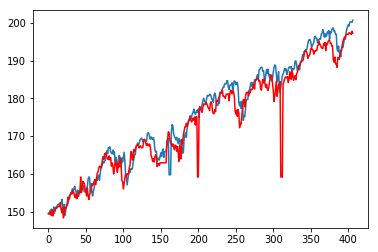

In [408]:
sigTrain = signal[:260]
sigTrain = sigTrain.values
sigTrain.shape = (260, 1)
sigTest = signal[260:]
sigTest = sigTest.values
sigTest.shape = (407,1)
spyTrain = spy[:260]
spyTrain = spyTrain.values
spyTrain.shape = (260, 1)
spyTest = spy[260:]
spyTest = spyTest.values
spyTest.shape = (407,1)
regr.fit(sigTrain, spyTrain)
pred = regr.predict(sigTest)
print('r2 score:')
print(r2_score(spyTest, pred))
print('mean squared error:')
print(mean_squared_error(spyTest, pred))
plt.plot(spyTest)
plt.plot(pred, color='red')
plt.show()

r2 score:
0.7842284942875045
mean squared error:
17.12661150884398


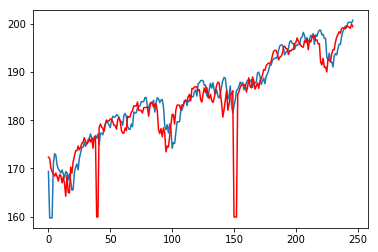

In [409]:
sigTrain = signal[:420]
sigTrain = sigTrain.values
sigTrain.shape = (420, 1)
sigTest = signal[420:]
sigTest = sigTest.values
sigTest.shape = (247,1)
spyTrain = spy[:420]
spyTrain = spyTrain.values
spyTrain.shape = (420, 1)
spyTest = spy[420:]
spyTest = spyTest.values
spyTest.shape = (247,1)
regr.fit(sigTrain, spyTrain)
pred = regr.predict(sigTest)
print('r2 score:')
print(r2_score(spyTest, pred))
print('mean squared error:')
print(mean_squared_error(spyTest, pred))
plt.plot(spyTest)
plt.plot(pred, color='red')
plt.show()

r2 score:
0.9540463682323163
mean squared error:
13.894897996930258


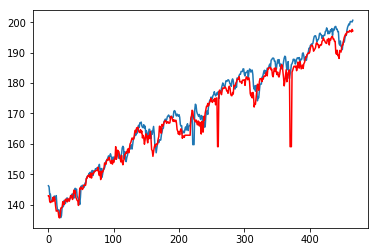

In [410]:
sigTrain = signal[:200]
sigTrain = sigTrain.values
sigTrain.shape = (200, 1)
sigTest = signal[200:]
sigTest = sigTest.values
sigTest.shape = (467,1)
spyTrain = spy[:200]
spyTrain = spyTrain.values
spyTrain.shape = (200, 1)
spyTest = spy[200:]
spyTest = spyTest.values
spyTest.shape = (467,1)
regr.fit(sigTrain, spyTrain)
pred = regr.predict(sigTest)
print('r2 score:')
print(r2_score(spyTest, pred))
print('mean squared error:')
print(mean_squared_error(spyTest, pred))
plt.plot(spyTest)
plt.plot(pred, color='red')
plt.show()

r2 score:
0.9546623421143979
mean squared error:
14.252378192352172


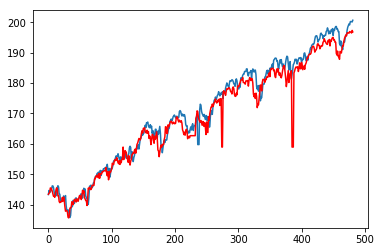

In [411]:
sigTrain = signal[:185]
sigTrain = sigTrain.values
sigTrain.shape = (185, 1)
sigTest = signal[185:]
sigTest = sigTest.values
sigTest.shape = (482,1)
spyTrain = spy[:185]
spyTrain = spyTrain.values
spyTrain.shape = (185, 1)
spyTest = spy[185:]
spyTest = spyTest.values
spyTest.shape = (482,1)
regr.fit(sigTrain, spyTrain)
pred = regr.predict(sigTest)
print('r2 score:')
print(r2_score(spyTest, pred))
print('mean squared error:')
print(mean_squared_error(spyTest, pred))
plt.plot(spyTest)
plt.plot(pred, color='red')
plt.show()

r2 score:
0.9440822686128676
mean squared error:
17.73840349227146


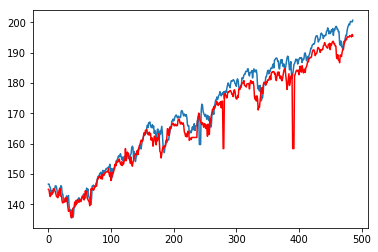

In [412]:
sigTrain = signal[:180]
sigTrain = sigTrain.values
sigTrain.shape = (180, 1)
sigTest = signal[180:]
sigTest = sigTest.values
sigTest.shape = (487,1)
spyTrain = spy[:180]
spyTrain = spyTrain.values
spyTrain.shape = (180, 1)
spyTest = spy[180:]
spyTest = spyTest.values
spyTest.shape = (487,1)
regr.fit(sigTrain, spyTrain)
pred = regr.predict(sigTest)
print('r2 score:')
print(r2_score(spyTest, pred))
print('mean squared error:')
print(mean_squared_error(spyTest, pred))
plt.plot(spyTest)
plt.plot(pred, color='red')
plt.show()

r2 score:
0.9521124816292738
mean squared error:
14.865649604658085


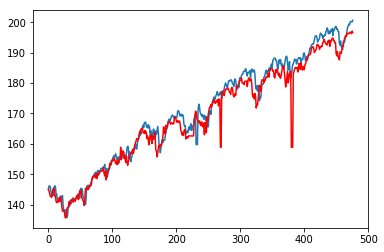

In [413]:
sigTrain = signal[:190]
sigTrain = sigTrain.values
sigTrain.shape = (190, 1)
sigTest = signal[190:]
sigTest = sigTest.values
sigTest.shape = (477,1)
spyTrain = spy[:190]
spyTrain = spyTrain.values
spyTrain.shape = (190, 1)
spyTest = spy[190:]
spyTest = spyTest.values
spyTest.shape = (477,1)
regr.fit(sigTrain, spyTrain)
pred = regr.predict(sigTest)
print('r2 score:')
print(r2_score(spyTest, pred))
print('mean squared error:')
print(mean_squared_error(spyTest, pred))
plt.plot(spyTest)
plt.plot(pred, color='red')
plt.show()

In [414]:
print('using 185 points of data for training yields the best predictive results with an r2 score of 0.9546 and mean squared') 
print('error of 14.25')

using 185 points of data for training yeilds the best predictive results with an r2 score of 0.9546 and mean squared
error of 14.25


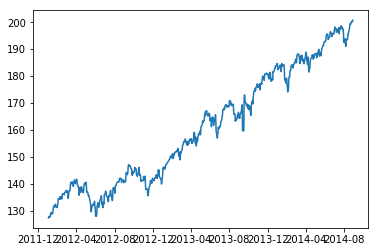

In [415]:
#The next set of cells performs a time series auto regression
#This cell visually checks if there is an increasing trend from viewing the graph of the series
ts.name = 'date'
plt.plot(ts)
plt.show()

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  import sys
C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


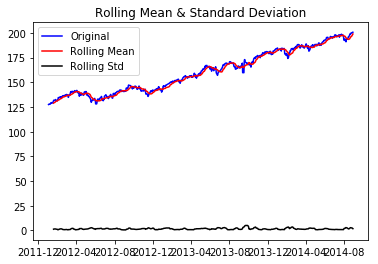

Results of Dickey-Fuller Test:
Test Statistic                  -0.068497
p-value                          0.952487
#Lags Used                       5.000000
Number of Observations Used    661.000000
Critical Value (1%)             -3.440282
Critical Value (5%)             -2.865922
Critical Value (10%)            -2.569104
dtype: float64


In [416]:
#^we can see there is an increasing trend
from statsmodels.tsa.stattools import adfuller
#stationarity test from Analytics Vidhya
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
#test stationarity of our series
test_stationarity(ts)

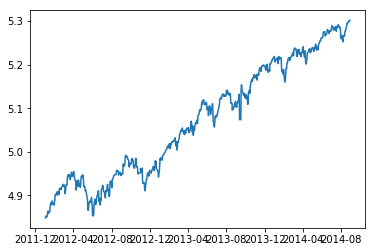

In [417]:
#^Mean is increasing in the graph and test statistic is higher than critical values, the series is not stationary
#take a log to smooth out higher values
ts_log = np.log(ts)
plt.plot(ts_log)
plt.show()

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=500,center=False).mean()
  after removing the cwd from sys.path.


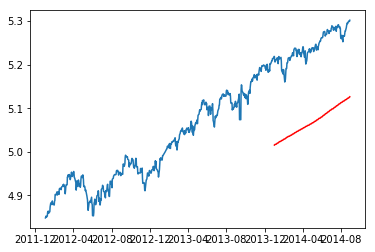

In [419]:
#the next couple of cells tries various methods of making the serious stationary
#tried taking a moving average of a year but 500 days yielded better results
#although an arbitrary number of 500 days isn't great for stock predication
moving_avg = pd.rolling_mean(ts_log, 500)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  import sys
C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


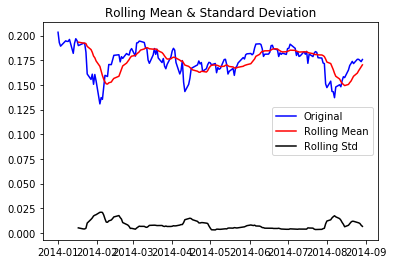

Results of Dickey-Fuller Test:
Test Statistic                  -3.428880
p-value                          0.010013
#Lags Used                       0.000000
Number of Observations Used    167.000000
Critical Value (1%)             -3.470126
Critical Value (5%)             -2.879008
Critical Value (10%)            -2.576083
dtype: float64


In [420]:
#subtract from the original series
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=4,min_periods=0,adjust=True,ignore_na=False).mean()
  """
C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  import sys
C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


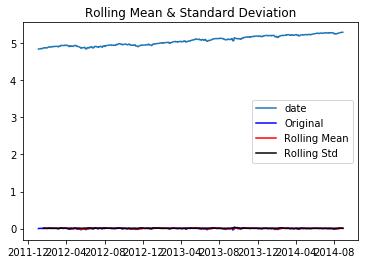

Results of Dickey-Fuller Test:
Test Statistic                -8.282271e+00
p-value                        4.486437e-13
#Lags Used                     3.000000e+00
Number of Observations Used    6.630000e+02
Critical Value (1%)           -3.440252e+00
Critical Value (5%)           -2.865909e+00
Critical Value (10%)          -2.569097e+00
dtype: float64


In [421]:
#^can say with 95% confidence it is stationary since test statistic is less than the 5% critical value

#now I tried with a weighted moving average, this one has exponential decay and assigns weights exponentially

#I tried various halflifes, a halflife of 4 appears to yield good results
expwighted_avg = pd.ewma(ts_log, halflife=4)
plt.plot(ts_log)
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

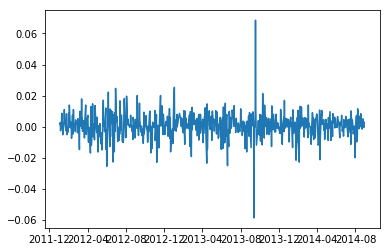

In [422]:
#^here we have 99% confidence it is stationary

#Now I tried a differencing technique where each value is subtracted by the previous value
ts_log_diff = ts_log - ts_log.shift(1)
plt.plot(ts_log_diff)
plt.show()

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  import sys
C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


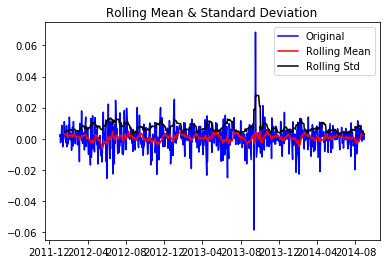

Results of Dickey-Fuller Test:
Test Statistic                -1.428393e+01
p-value                        1.309669e-26
#Lags Used                     4.000000e+00
Number of Observations Used    6.610000e+02
Critical Value (1%)           -3.440282e+00
Critical Value (5%)           -2.865922e+00
Critical Value (10%)          -2.569104e+00
dtype: float64


In [423]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  import sys
C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


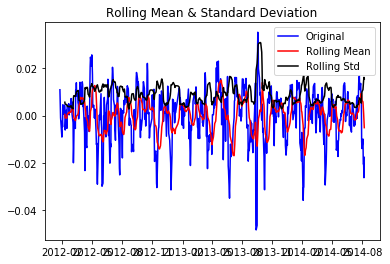

Results of Dickey-Fuller Test:
Test Statistic                -8.931815e+00
p-value                        9.768954e-15
#Lags Used                     1.000000e+01
Number of Observations Used    6.260000e+02
Critical Value (1%)           -3.440839e+00
Critical Value (5%)           -2.866168e+00
Critical Value (10%)          -2.569235e+00
dtype: float64


In [424]:
#^judging from the test statistic this doesn't appear to be stationary

#here I tried a decomposition method
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

C:\Users\Conor\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Conor\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Conor\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: D

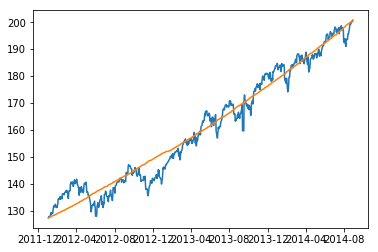

rmse:
4.101210847341217
r2 score
0.9632843233597901


In [425]:
#^it appears from the test statistic to be stationary with 99% confidence

#In the next couple of cells I fitted the data I tried to make stationary to an auto regression model
#I used the order for either the AR, MA, or combined model based on what yielded the best results

#here I used the regular logged data
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
#now that the model is fitted I set the values back to the orignal scale
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
#add differences consecutively to the base number, this is done by
#finding the cumsum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
#adding these values to the base number
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
#taking an exponent
predictions_ARIMA = np.exp(predictions_ARIMA_log)
#now compare the predictions with the original values
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.show()
print('rmse:')
print(np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
print('r2 score')
print(r2_score(ts, predictions_ARIMA))

C:\Users\Conor\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Conor\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Conor\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


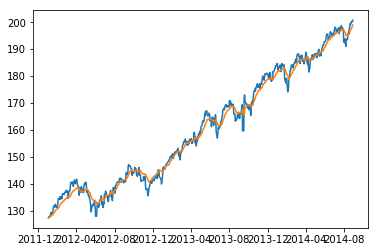

rmse:
2.1610269303759995
r2 score:
0.989805927930442


In [426]:
#^It appears to predict well but the data I used wasn't stationary

#here I tried fitting the moving average with exponential decay data to the auto regression model
model = ARIMA(expwighted_avg, order=(2, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.show()
print('rmse:')
print(np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
print('r2 score:')
print(r2_score(ts, predictions_ARIMA))

C:\Users\Conor\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Conor\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Conor\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


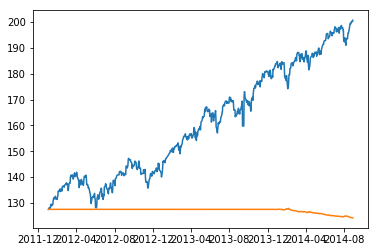

rmse:
40.36150510126198
r2 score:
-2.556002416519946


In [427]:
#^this model appears to fit very well and has a low rmse

#now I tried the moving avg values
model = ARIMA(ts_log_moving_avg_diff, order=(2, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.show()
print('rmse:')
print(np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
print('r2 score:')
print(r2_score(ts, predictions_ARIMA))

C:\Users\Conor\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Conor\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Conor\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


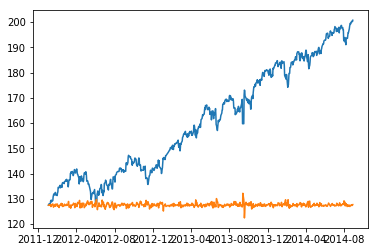

rmse:
39.658517134872746
r2 score
-2.4332093344381467


In [428]:
#^this model as can be seen did not predict well, this can be expected since a moving average with an arbritrary number of
#days isn't the best model for a stock market set of data since it doesn't have an exact time period that defines it

#now I tried the values I used differencing on
model = ARIMA(ts_log_diff, order=(2, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.show()
print('rmse:')
print(np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
print('r2 score')
print(r2_score(ts, predictions_ARIMA))

C:\Users\Conor\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Conor\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Conor\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:629: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Conor\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:629: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Conor\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\Users\Conor\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: overfl

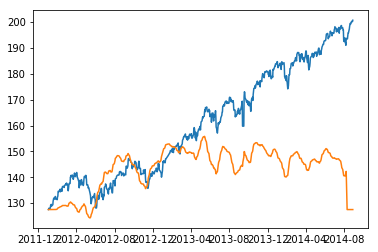

rmse:
26.00757970770248
r2 score:
-0.47647880814233545


In [429]:
#^this model did not predict well either

#now I tried the values obtained from the decomposition technique
model = ARIMA(ts_log_decompose, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.show()
print('rmse:')
print(np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
print('r2 score:')
print(r2_score(ts, predictions_ARIMA))

In [ ]:
#This is another model that didn't predict well

In [431]:
print('It appears that the data that was made stationary by the exponentially weighted moving average technique allowed for')
print('the best predictive auto regression model, with a rmse of 2.16 and r2 score of 0.989')

It appears that the data that was made stationary by the exponentially weighted moving average technique allowed for
the best predictive auto regression model, with a rmse of 2.16 and r2 score of 0.989


In [433]:
print('In conclusion as shown earlier, linear regression using signal can be used to predict spy close price as we recieved a')
print('great r2 score of 0.95. Also when the data is made stationary by using an exponentially weighted moving average')
print('technique we can fit a good auto regression model. An experiement I would like to try is prediction using RNN')
print('but I could not because of time constraints, especailly since it is the approach I feel less comfortable with.')

In conclusion as shown earlier, linear regression using signal can be used to predict spy close price as we recieved a
great r2 score of 0.95. Also when the data is made stationary by using an exponentially weighted moving average
technique we can fit a good auto regression model. An experiement I would like to try is prediction using RNN
but I could not because of time constraints, especailly since it is the approach I feel less comfortable with.
